In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
X_train = pd.read_csv('train.csv')
y_train = X_train['FLAG']
X_test = pd.read_csv('test.csv')
y_test = X_test['FLAG']

In [240]:
X_train.drop(columns=['Unnamed: 0','FLAG'], inplace = True) # drop the first two columns cause unique
X_test.drop(columns=['Unnamed: 0','FLAG'], inplace = True) # drop the first two columns cause unique


Generate Validation Set from X_train

In [241]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2)

In [242]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(random_state=42,max_iter=1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [243]:
from sklearn.metrics import classification_report

In [244]:
y_train_pred = logisticRegr.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6120
           1       0.97      0.97      0.97      6120

    accuracy                           0.97     12240
   macro avg       0.97      0.97      0.97     12240
weighted avg       0.97      0.97      0.97     12240



In [245]:
y_test_pred = logisticRegr.predict(X_test)
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1542
           1       0.89      0.97      0.93       427

    accuracy                           0.97      1969
   macro avg       0.94      0.97      0.95      1969
weighted avg       0.97      0.97      0.97      1969



In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision', 'recall']
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_validate(rf, X_train, y_train)
rf_results = cross_validate(estimator=rf,
                               X=X_train,
                               y=y_train,
                               cv=5,
                               scoring=scoring,
                               return_train_score=True)


In [255]:
val_results = {'accuracy':rf_results['test_accuracy'],'precision':rf_results['test_precision'],'recall':rf_results['test_recall']}
train_results = {'accuracy':rf_results['train_accuracy'],'precision':rf_results['train_precision'],'recall':rf_results['train_recall']}

In [256]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

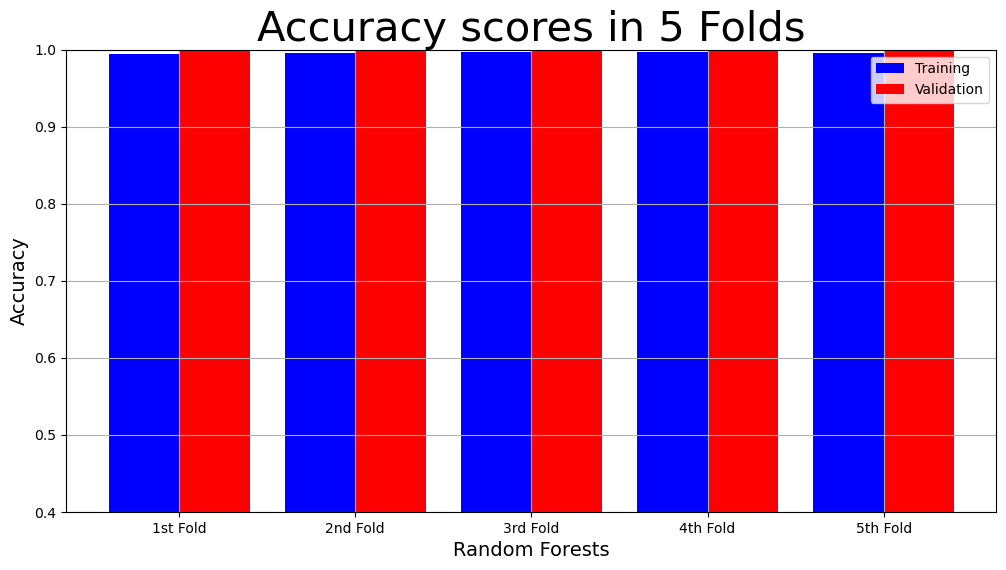

In [257]:
plot_result('Random Forests',
            "Accuracy",
            "Accuracy scores in 5 Folds",
            val_results["accuracy"],
            train_results["accuracy"])

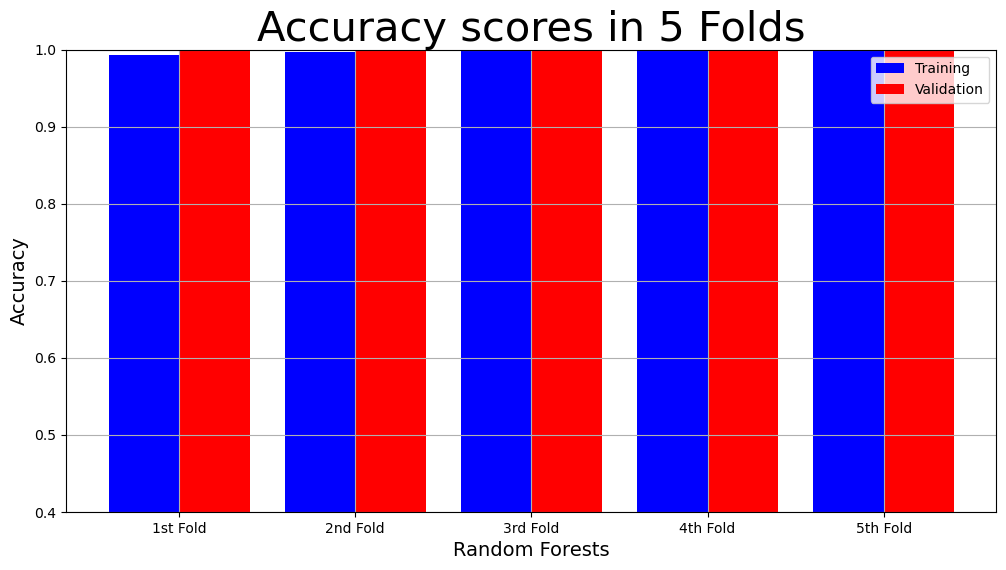

In [258]:
plot_result('Random Forests',
            "Accuracy",
            "Accuracy scores in 5 Folds",
            val_results["recall"],
            train_results["recall"])

In [259]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
test_pred = rf.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1542
           1       0.98      0.96      0.97       427

    accuracy                           0.99      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969



Feature importance of RF with default parameters

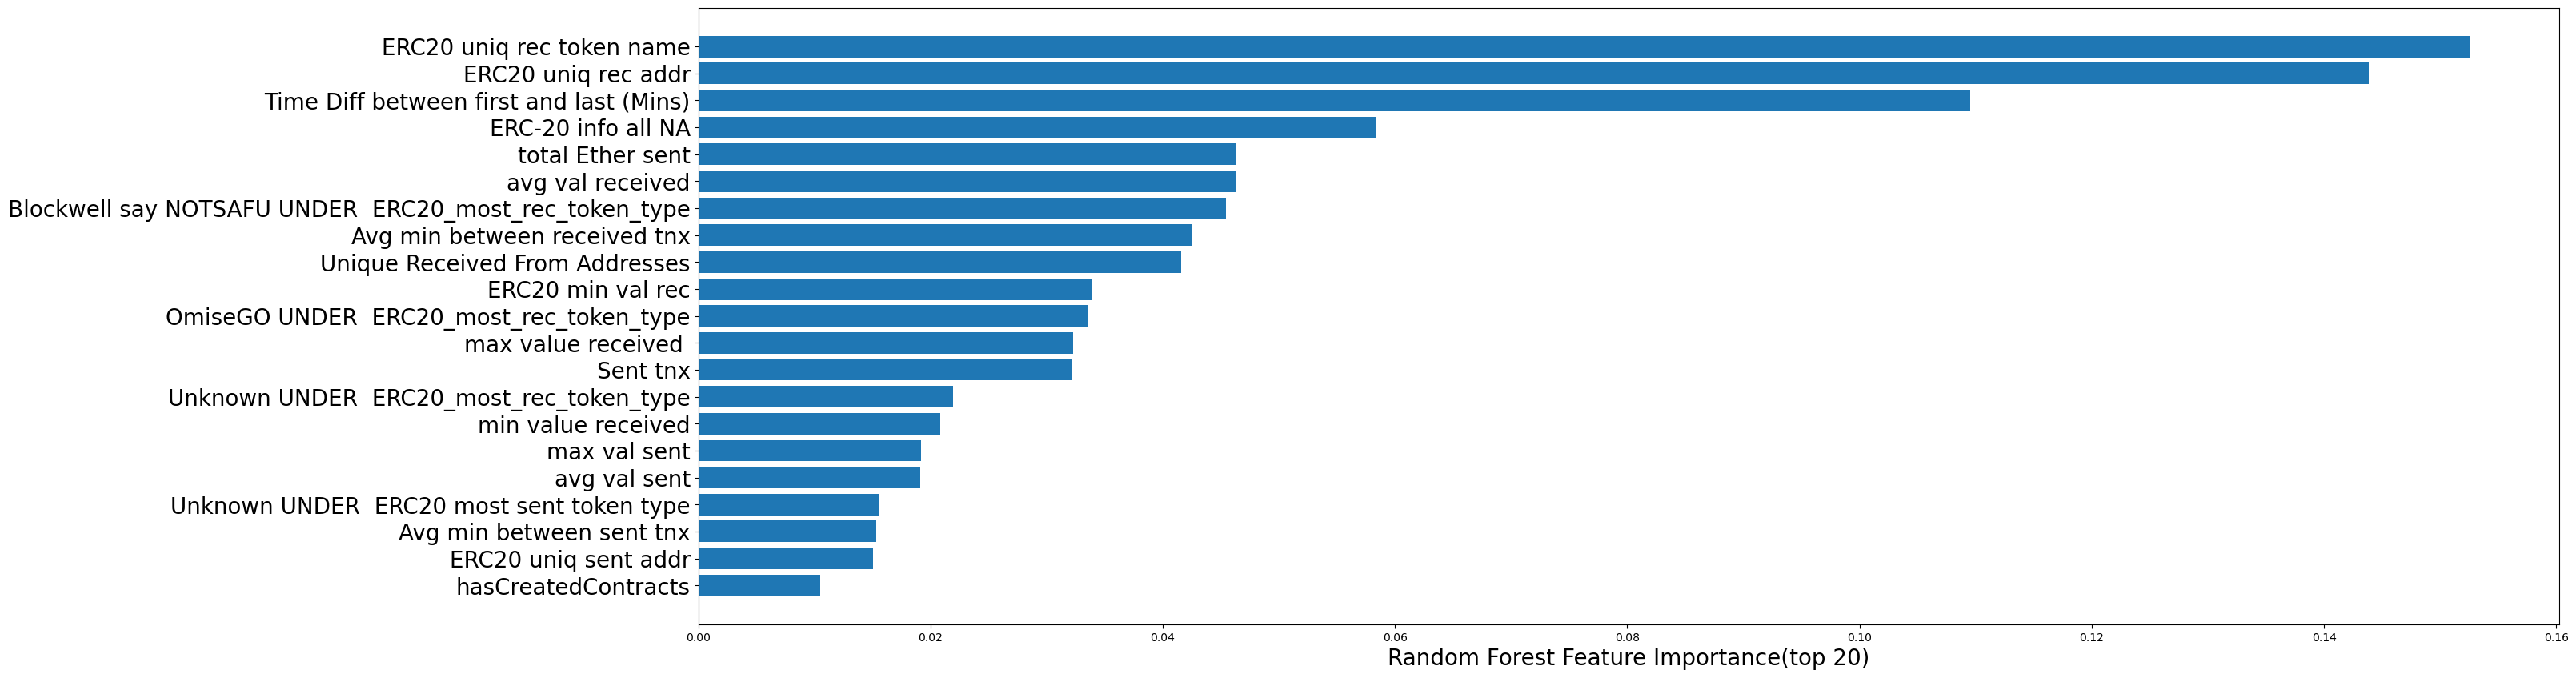

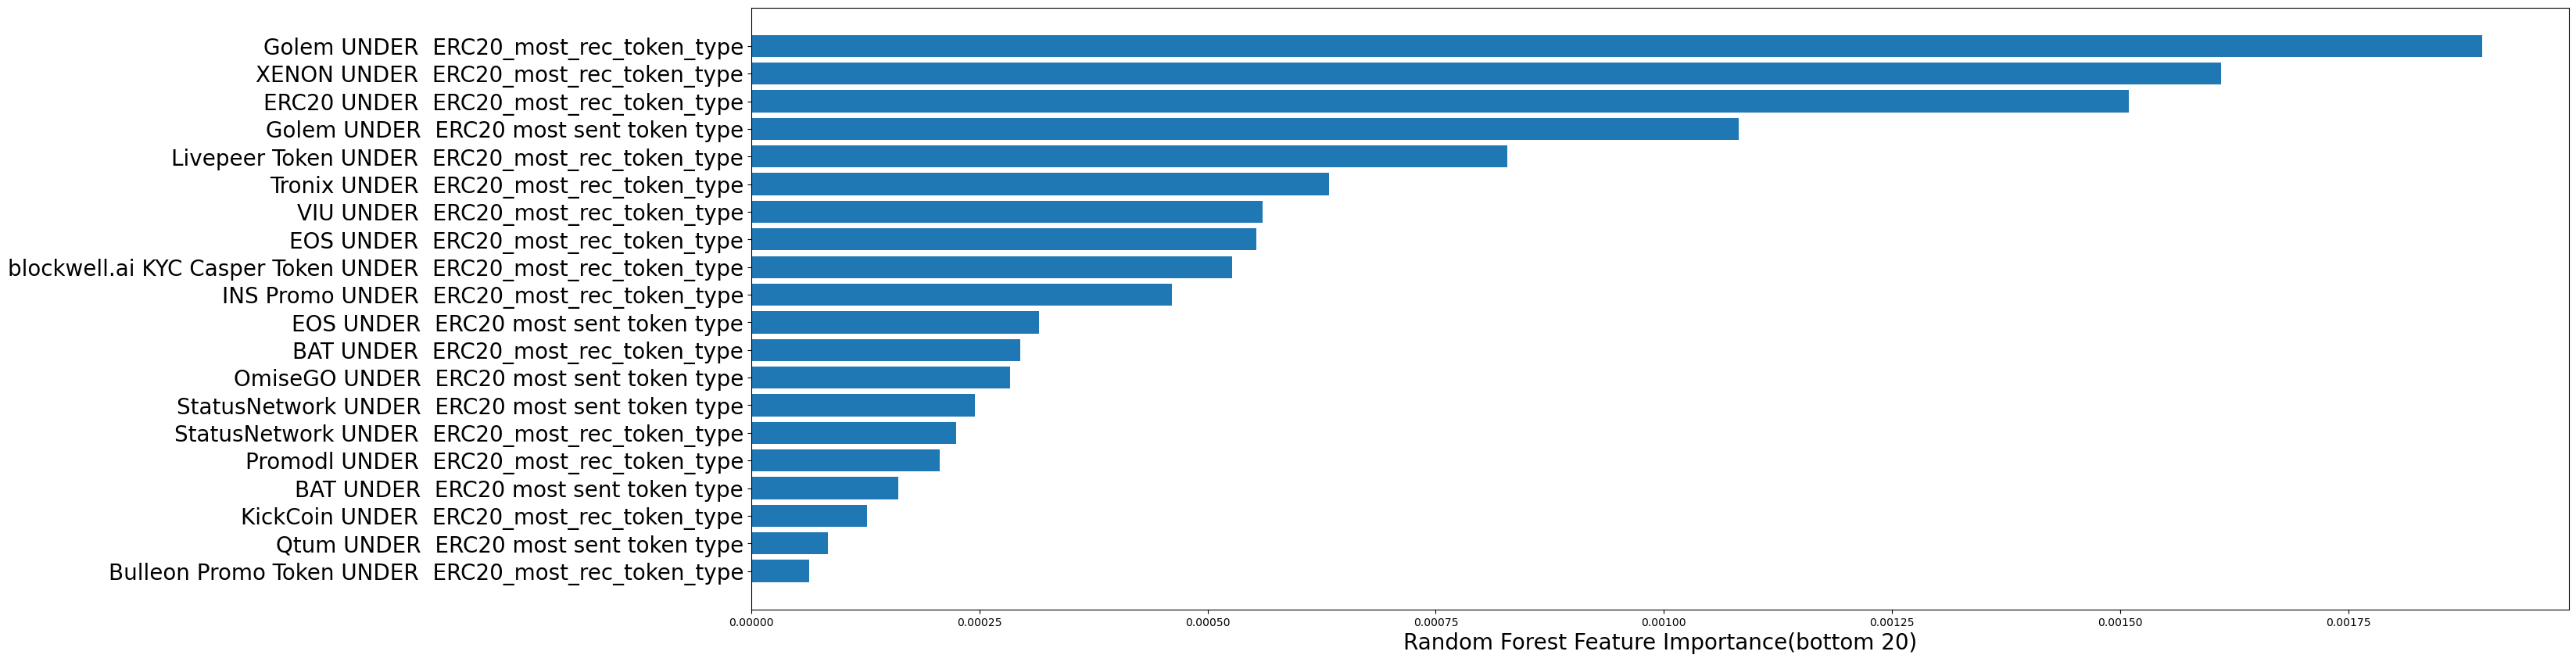

In [260]:
feature_names = pd.read_csv('feature_category.csv',index_col=False)
feature_names = feature_names.drop(columns='Unnamed: 0').values
sorted_idx = rf.feature_importances_.argsort()
features_value_pair = np.array([np.array((feature_names[index])) for index in sorted_idx])
features_value_pair
fig, axes = plt.subplots(figsize=(30,10))
labels = [x[1] + ' UNDER ' + x[0] if str(x[1])!='nan' else x[0] for x in features_value_pair]
plt.barh(labels[28:], RF.feature_importances_[sorted_idx][28:])
plt.xlabel("Random Forest Feature Importance(top 20)", fontdict={'size':20})
plt.yticks(font={'size':20})
plt.show()
fig, axes = plt.subplots(figsize=(30,10))
labels = [x[1] + ' UNDER ' + x[0] if str(x[1])!='nan' else x[0] for x in features_value_pair]
plt.barh(labels[:20], RF.feature_importances_[sorted_idx][:20])
plt.xlabel("Random Forest Feature Importance(bottom 20)", fontdict={'size':20})
plt.yticks(font={'size':20})
plt.show()